# **Regresores para hallar %CCR**

### SVR y PLS

Agregando ciclo for al random state y a componentes

## **Importe Librerias**


In [4]:
#Librerias Tratamiento de datos
import pandas as pd
import numpy as np 
import openpyxl
import sklearn
from sklearn.preprocessing import Normalizer # Normalizacion de datos


#Librerias Creacion de Modelos
from sklearn.model_selection import train_test_split #Partir datos de prueba y entrenamiento
from sklearn.preprocessing import StandardScaler    #Normalizar datos para manejar la misma escala
from sklearn.decomposition import PCA   #Algoritmo PCA
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.cross_decomposition import PLSRegression



#Librerias Metricas
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
###############################################
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import cross_val_score


#Graficas
import matplotlib.pyplot as plt
import seaborn as sns
#from mlxtend.plotting import plot_decision_regions

In [5]:
print(sklearn.__version__)  # chekear si el ambiente funciona
print(pd.__version__)

1.0.2
1.3.5


## **Tratamiendo de Datos**

In [6]:
#Dataset 40 muestras (Masas)
#Dataframe Supplementary_CCR_spectra
dt_Supp_spect = pd.read_csv("Data/Supplementary_CCR_spectra.csv",sep=",", decimal=",") #import dtframe

print(dt_Supp_spect.shape)
print("#"*62)
print(dt_Supp_spect.dtypes)
print("#"*62)
dt_Supp_spect.head() #print dt frame

(59692, 41)
##############################################################
Molecules\Samples     object
CR1                  float64
CR2                  float64
CR3                  float64
CR4                  float64
CR5                  float64
CR6                  float64
CR7                  float64
CR8                  float64
CR9                  float64
CR10                 float64
CR11                 float64
CR12                 float64
CR13                 float64
CR14                 float64
CR15                 float64
CR16                 float64
CR17                 float64
CR18                 float64
CR19                 float64
CR20                 float64
CR21                 float64
VR1                  float64
VR2                  float64
VR3                  float64
VR4                  float64
VR5                  float64
VR6                  float64
VR7                  float64
VR8                  float64
VR9                  float64
VR10                 float

,Molecules\Samples,CR1,CR2,CR3,CR4,CR5,CR6,CR7,CR8,CR9,...,VR10,VR11,VR12,VR13,VR14,VR15,VR16,VR17,VR18,VR19
0,C18H30,16.122,28.754,11.208,24.784,2.360,2.252,2.612,2.020,17.854,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,C19H28,30.101,35.596,18.767,36.845,10.718,7.076,10.005,11.003,35.712,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,C20H26,38.500,54.152,30.508,55.708,25.710,16.029,22.088,28.136,50.344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,C20H30,31.574,43.425,27.087,41.362,43.697,36.075,39.573,46.366,35.953,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,C21H26,52.324,62.510,40.397,57.982,37.720,24.171,25.059,41.800,63.023,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
#import target 40 muestras (masas)(Crudos y Fondos/Vacios)
#Dataframe Supplementary_CCR_properties
dt_Supp_Prop = pd.read_csv('Data/Supplementary_CCR_properties.csv',sep=",", decimal=",") #import dtframe
print('shape: ',dt_Supp_Prop.shape)
print('#'*85)
print(dt_Supp_Prop.dtypes)
print('#'*85)
dt_Supp_Prop.head() #print dt frame

shape:  (40, 2)
#####################################################################################
Samples       object
CCR (wt%)    float64
dtype: object
#####################################################################################


,Samples,CCR (wt%)
0,CR1,12.94
1,CR2,4.34
2,CR3,9.67
3,CR4,7.03
4,CR5,17.84


In [8]:
#Dataframe Supplementary_CCR_spectra transpose
dt_spec_Transpose = dt_Supp_spect.transpose()
dt_spec_cut = dt_spec_Transpose.drop(dt_spec_Transpose.index[[0]]) ## eliminar columna moleculas
dt_spec_cut = dt_spec_cut.loc[:, (dt_spec_cut != 0).any(axis=0)] ##eliminar columnas 0
print(dt_spec_cut.shape)
dt_spec_cut.head(41)

(40, 55154)


,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
CR1,16.122,30.101,38.5,31.574,52.324,23.838,65.693,47.62,49.053,64.986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR2,28.754,35.596,54.152,43.425,62.51,37.521,82.04,73.056,66.248,86.506,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR3,11.208,18.767,30.508,27.087,40.397,15.232,51.565,30.627,45.974,74.695,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR4,24.784,36.845,55.708,41.362,57.982,27.374,82.94,60.11,67.817,79.501,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR5,2.36,10.718,25.71,43.697,37.72,29.929,56.975,26.378,83.384,80.18,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR6,2.252,7.076,16.029,36.075,24.171,47.137,46.952,48.978,58.504,56.834,...,0.0,1.528,1.728,1.702,1.521,1.506,2.188,0.0,0.0,0.0
CR7,2.612,10.005,22.088,39.573,25.059,43.698,51.55,43.905,63.517,54.516,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.299,2.354,2.223
CR8,2.02,11.003,28.136,46.366,41.8,30.415,53.8,29.205,77.326,76.793,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR9,17.854,35.712,50.344,35.953,63.023,29.398,69.367,58.145,73.41,82.545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
CR10,15.985,28.735,41.754,30.995,40.59,28.725,54.259,52.429,53.938,57.728,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
dt_spec_cut.shape

(40, 55154)

In [10]:
from sklearn.preprocessing import Normalizer

# Crear instancias del normalizador
normalizer = Normalizer()

# Normalizar cada subconjunto de datos
normalized_data = normalizer.fit_transform(dt_spec_cut)
# Convertir a DataFrame
dt_Supp_spect_cut_normalized = pd.DataFrame(normalized_data, columns=dt_spec_cut.columns)

In [11]:
dt_Supp_spect_cut_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,59682,59683,59684,59685,59686,59687,59688,59689,59690,59691
0,0.023238,0.043387,0.055493,0.045510,0.075419,0.034360,0.094688,0.068638,0.070704,0.093669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.027810,0.034427,0.052374,0.041999,0.060458,0.036289,0.079346,0.070657,0.064073,0.083666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.019842,0.033224,0.054009,0.047953,0.071515,0.026965,0.091286,0.054219,0.081389,0.132234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.031608,0.046990,0.071046,0.052750,0.073946,0.034911,0.105776,0.076660,0.086489,0.101390,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.002380,0.010807,0.025925,0.044062,0.038035,0.030179,0.057451,0.026598,0.084080,0.080849,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
pca=PCA(n_components=7) #
pca.fit(dt_Supp_spect_cut_normalized) # obtener los componentes principales
datos_pca=pca.transform(dt_Supp_spect_cut_normalized) # convertimos nuestros datos con las nuevas dimensiones de PCA
print(datos_pca.shape)
print(type(datos_pca))
print(datos_pca)

(40, 7)
<class 'numpy.ndarray'>
[[-4.13842111e-01 -9.86840087e-02  3.09988030e-02  9.90045846e-04
  -6.10267807e-02 -2.51443285e-02 -2.71438979e-02]
 [-3.59409682e-01 -7.01646722e-02 -5.60381830e-02 -3.85987930e-02
  -4.29123138e-02 -2.16604234e-02 -7.63120766e-03]
 [-5.45980512e-01  3.44949860e-03  8.70729335e-02  1.58184691e-01
  -3.54469105e-02  4.99391625e-02  2.47203090e-02]
 [-4.76666053e-01 -8.63659025e-03  5.19915522e-02  1.01954238e-01
  -1.64197813e-02  3.74864360e-02  1.24519445e-02]
 [-3.63825867e-01  1.83816101e-01  1.51286339e-01  1.45013291e-02
   8.59181440e-02 -7.20476433e-02 -3.99307899e-02]
 [-3.00931876e-01 -6.03983457e-02 -1.90087041e-01 -4.58652831e-02
   9.03359670e-03 -6.45146378e-02  7.46698449e-02]
 [-3.21108270e-01  3.25208923e-02 -1.32621811e-01 -1.91377984e-02
   3.24503554e-02 -5.04614093e-02  7.41457621e-02]
 [-4.05073262e-01  7.45107198e-02  1.28627240e-01 -5.17997539e-04
   2.80268467e-02 -4.15605712e-02 -3.70198699e-02]
 [-3.86986373e-01 -8.67124797e-0

In [13]:
# Crear DataFrame de datos PCA
datos_pca_df = pd.DataFrame(datos_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8])

# Ahora puedes imprimirlo de manera similar
print(datos_pca_df.head())

SyntaxError: EOL while scanning string literal (986760127.py, line 2)

In [14]:
#Definimos las moleculas como Features
# dt_features= dt_spec_cut.to_numpy()  #Variables predictoras
#Definimos CCR% como Target
dt_target=dt_Supp_Prop['CCR (wt%)'].to_numpy()  #Variable Objetivo
#Normalizacion de datos
# dt_features = Normalizer().fit_transform(dt_features) #Normalizar datos


In [15]:
datos_pca

array([[-4.13842111e-01, -9.86840087e-02,  3.09988030e-02,
         9.90045846e-04, -6.10267807e-02, -2.51443285e-02,
        -2.71438979e-02],
       [-3.59409682e-01, -7.01646722e-02, -5.60381830e-02,
        -3.85987930e-02, -4.29123138e-02, -2.16604234e-02,
        -7.63120766e-03],
       [-5.45980512e-01,  3.44949860e-03,  8.70729335e-02,
         1.58184691e-01, -3.54469105e-02,  4.99391625e-02,
         2.47203090e-02],
       [-4.76666053e-01, -8.63659025e-03,  5.19915522e-02,
         1.01954238e-01, -1.64197813e-02,  3.74864360e-02,
         1.24519445e-02],
       [-3.63825867e-01,  1.83816101e-01,  1.51286339e-01,
         1.45013291e-02,  8.59181440e-02, -7.20476433e-02,
        -3.99307899e-02],
       [-3.00931876e-01, -6.03983457e-02, -1.90087041e-01,
        -4.58652831e-02,  9.03359670e-03, -6.45146378e-02,
         7.46698449e-02],
       [-3.21108270e-01,  3.25208923e-02, -1.32621811e-01,
        -1.91377984e-02,  3.24503554e-02, -5.04614093e-02,
         7.4145762

# **Aplicacion Modelos ML**


In [16]:
# Creación del modelo SVR
# ==============================================================================
#modelo = SVC(kernel='poly', probability=True, tol=1e-3) SVC al ser un modelo de clasificacion no funciona para este tipo de datos sin embargo es posible mezclarlo con PCA
modeloSVR = SVR(C = 50, kernel = 'poly', degree=2)
modeloPLS = PLSRegression(n_components=2)

In [17]:
bestErrorSVR=[]
bestErrorPLS=[]
bestR2SVR=[]
bestR2PLS=[]
for i in range (1,1024):
    X_train, X_test, y_train, y_test= train_test_split(datos_pca, dt_target, train_size= 0.8,random_state = i ,shuffle = True) #parametro random state permite que siempre su usen las mismas muestras
    #Fit models
    modeloSVR.fit(X_train, y_train)
    modeloPLS.fit(X_train, y_train)
    
    #Predict Models
    prediccionesSVR = modeloSVR.predict(X_test)
    prediccionesPLS = modeloPLS.predict(X_test)
    
    #Error medio Cuadrado - Valor ideal 0
    MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
    MSE_PLS = mean_squared_error(y_test, prediccionesPLS)
    
    #Agregar Valores a la matriz
    bestErrorSVR.append(MSE_SVR) # Valor ideal 0
    bestErrorPLS.append(MSE_PLS) #Valor ideal 0
    
    #Error R2 - Valor ideal 1
    r2SVR= r2_score(y_test, prediccionesSVR)#Valor ideal 1
    r2PLS= r2_score(y_test, prediccionesPLS)#Valor ideal 1
    
    #Agregar valores a la matriz
    bestR2SVR.append(r2SVR)
    bestR2PLS.append(r2PLS)

In [18]:
print(len(bestErrorSVR))

1023


In [19]:
print(np.argmin(bestErrorSVR))
print(np.min(bestErrorSVR))
print(bestErrorSVR[671])

231
11.202856273849822
38.653605598062214


In [20]:
print(np.argmax(bestR2SVR))
print(np.max(bestR2SVR))

787
0.8193937360935839


In [21]:
#partir conjunto de entrenamiento


X_train, X_test, y_train, y_test= train_test_split(datos_pca, dt_target, train_size= 0.8,random_state =np.argmax(bestR2SVR)+1 , shuffle = True) #parametro random state permite que siempre su usen las mismas muestras

# ============================================================
modeloSVR.fit(X_train, y_train)
modeloPLS.fit(X_train, y_train)

#============================================================
prediccionesSVR_train = modeloSVR.predict(X_train)
prediccionesPLS_train = modeloPLS.predict(X_train)

#============================================================
prediccionesSVR = modeloSVR.predict(X_test)
prediccionesPLS = modeloPLS.predict(X_test)
print("prediccionesSVR",prediccionesSVR)
print("prediccionesPLS",prediccionesPLS)
print("y_test",y_test.shape,y_test)

#=====================================================


#Error medio Cuadrado - Valor ideal 0
from sklearn.metrics import mean_squared_error
MSE_SVR = mean_squared_error(y_test, prediccionesSVR)
MSE_LPS = mean_squared_error(y_test, prediccionesPLS)

print('ErrorMedioCuadrado SVR= ', MSE_SVR)
print('ErrorMedioCuadrado PLS= ', MSE_LPS)

#====================================================
#Error R2 - Valor ideal 1
from sklearn.metrics import r2_score

r2SVR= r2_score(y_test, prediccionesSVR)
r2PLS= r2_score(y_test, prediccionesPLS)

print('r2error SVR= ', r2SVR)
print('r2error PLS= ', r2PLS)

prediccionesSVR [ 7.40484137 11.10164391 14.57674802 10.11307833 25.48972254  9.41848527
 25.25437991 18.1802093 ]
prediccionesPLS [[ 5.70866173]
 [27.10602669]
 [16.72973464]
 [ 9.52588225]
 [23.79276239]
 [ 9.88683761]
 [25.03841811]
 [20.64500531]]
y_test (8,) [ 5.34 13.5  16.41 11.94 21.6   4.34 30.6  21.8 ]
ErrorMedioCuadrado SVR=  12.414203797975006
ErrorMedioCuadrado PLS=  32.378861088123
r2error SVR=  0.8193937360935839
r2error PLS=  0.5289407822010606


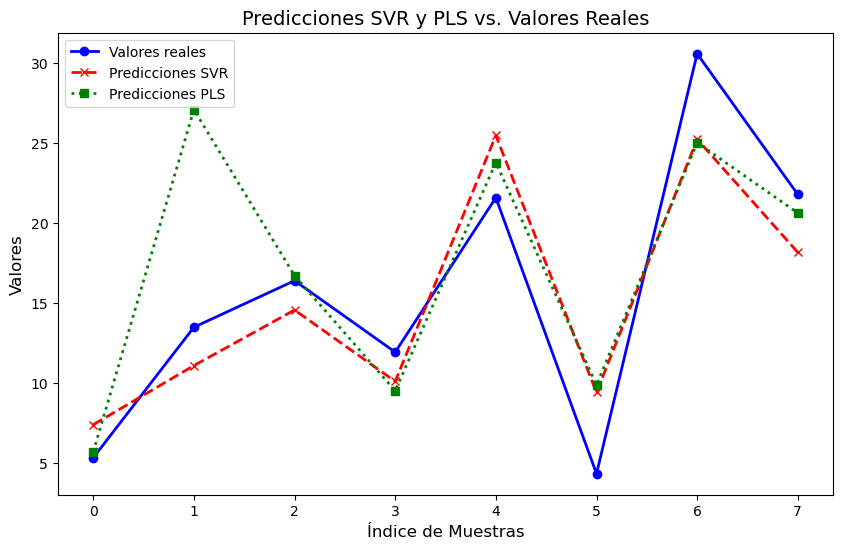

In [22]:
plt.figure(figsize=(10, 6))

# Gráfico de líneas para valores reales
plt.plot(np.arange(len(y_test)), y_test, color='blue', label='Valores reales', marker='o', linestyle='-', linewidth=2)

# Gráfico de líneas para predicciones SVR
plt.plot(np.arange(len(prediccionesSVR)), prediccionesSVR, color='red', label='Predicciones SVR', marker='x', linestyle='--', linewidth=2)

# Gráfico de líneas para predicciones PLS
plt.plot(np.arange(len(prediccionesPLS)), prediccionesPLS, color='green', label='Predicciones PLS', marker='s', linestyle=':', linewidth=2)

# Agregar etiquetas y leyenda
plt.title('Predicciones SVR y PLS vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Muestras', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='best')

plt.savefig("Graficas/CCRIter_PrediccionesSVRPLS.png")


# Mostrar gráfico
plt.show()

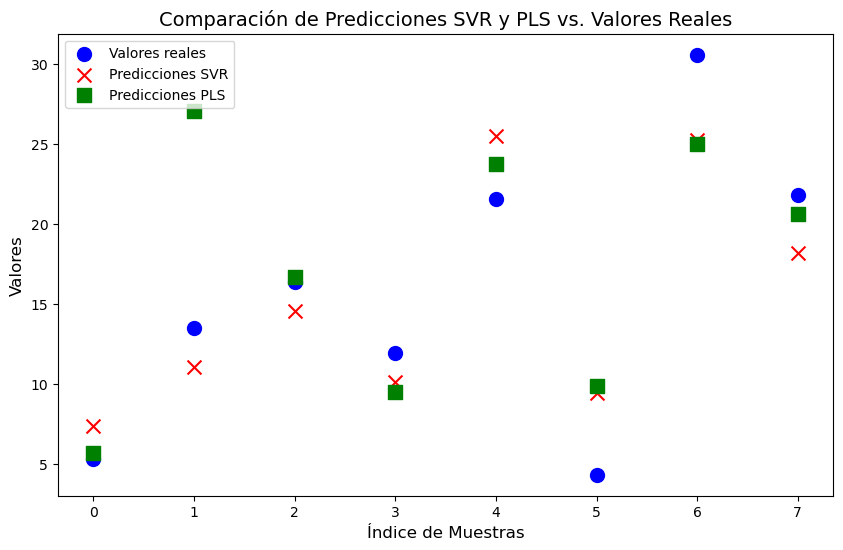

In [23]:
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Gráfico para predicciones SVR
plt.scatter(np.arange(len(y_test)), y_test, color='blue', label='Valores reales', marker='o', s=100)
plt.scatter(np.arange(len(prediccionesSVR)), prediccionesSVR, color='red', label='Predicciones SVR', marker='x', s=100)

# Gráfico para predicciones PLS
plt.scatter(np.arange(len(prediccionesPLS)), prediccionesPLS, color='green', label='Predicciones PLS', marker='s', s=100)

# Agregar etiquetas y leyenda
plt.title('Comparación de Predicciones SVR y PLS vs. Valores Reales', fontsize=14)
plt.xlabel('Índice de Muestras', fontsize=12)
plt.ylabel('Valores', fontsize=12)
plt.legend(loc='best')

## Graficas

In [24]:
#Grafico Resultados SVR

import matplotlib.pyplot as plt 
import seaborn as sns

y_pred=prediccionesPLS_train
y_pred_test=prediccionesPLS

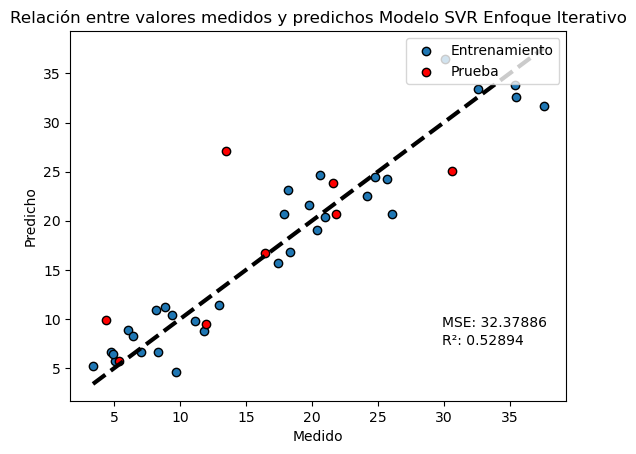

In [38]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Entrenamiento')  # Etiqueta para datos de entrenamiento
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Prueba')  # Etiqueta para datos de prueba
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)

# Añadiendo etiquetas para los textos de métricas
plt.text(0.75, 0.2, f"MSE: {MSE_LPS:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R²: {r2PLS:.5f}", transform=plt.gca().transAxes)

# Configurando etiquetas de los ejes
ax.set_xlabel('Medido')
ax.set_ylabel('Predicho')
ax.set_title('Relación entre valores medidos y predichos Modelo SVR Enfoque Iterativo')

# Añadiendo leyenda para identificar los colores
ax.legend(loc='upper right')

plt.show()

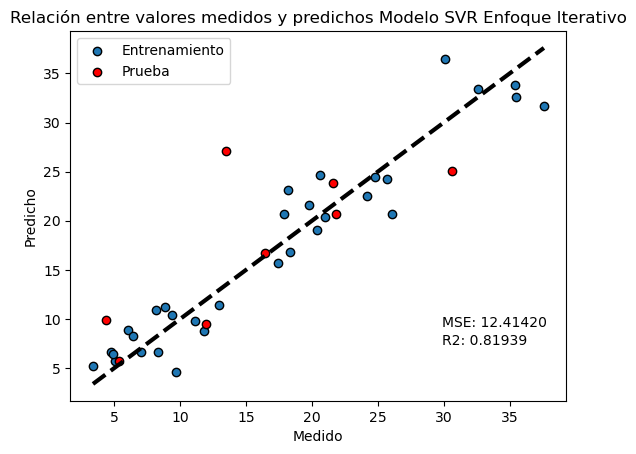

In [40]:
fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0), label='Entrenamiento')  # Etiqueta para datos de entrenamiento
ax.scatter(y_test, y_pred_test, color='red', edgecolors=(0, 0, 0), label='Prueba')  # Etiqueta para datos de prueba
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
plt.text(0.75, 0.2, f"MSE: {MSE_SVR:.5f}", transform=plt.gca().transAxes)
plt.text(0.75, 0.15, f"R2: {r2SVR:.5f}", transform=plt.gca().transAxes)
ax.set_xlabel('Medido')
ax.set_ylabel('Predicho')
ax.set_title('Relación entre valores medidos y predichos Modelo SVR Enfoque Iterativo')
ax.legend(loc='upper left')

plt.show()

In [26]:
from joblib import dump
dump(modeloSVR, './modelosPKL/Regrecion%CCR_SVR.pkl')
 

['./modelosPKL/Regrecion%CCR_SVR.pkl']